# SETUP

In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  


In [2]:
# Functions 
def myCols(string, start, end, npoints):
    Side = np.linspace(start, end, npoints)
    String = string
    Cols = []
    for index,num in enumerate(Side): 
        Col= String + str(int(num)) 
        Cols = [*Cols, Col]
    return Cols

## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', round(np.sqrt(mean_squared_error(true, predicted)),4), 'for ', name)
    print('R^2 Score on test data:', round(r2_score(true, predicted), 4), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [3]:
# Create Column Names
topCol_names = myCols('Top Point ', 0, 450, 451) # energy from -400 to +500 means 451 points 
bondCol_names = myCols('Bond Point ', 0, 450, 451)
delta_names = ['deltaR', 'deltaI']
col_names = delta_names + topCol_names + bondCol_names

In [4]:
#Load Training Data
data = pd.read_csv('Training_Data/Graphene/ES_AG_Spec_data_changeDispersion_0.940.csv', header = None, names = col_names) # read the data in 
data.head() # show the data in notebook 

,deltaR,deltaI,Top Point 0,Top Point 1,Top Point 2,Top Point 3,Top Point 4,Top Point 5,Top Point 6,Top Point 7,...,Bond Point 441,Bond Point 442,Bond Point 443,Bond Point 444,Bond Point 445,Bond Point 446,Bond Point 447,Bond Point 448,Bond Point 449,Bond Point 450
0,-0.29103,0.85577,0.51760,0.52177,0.52558,0.52994,0.53379,0.53809,0.54267,0.54695,...,0.78551,0.78853,0.79113,0.79338,0.79532,0.79700,0.79831,0.79953,0.80046,0.80127
1,-0.14798,0.67080,0.57032,0.57587,0.58096,0.58646,0.59139,0.59664,0.60207,0.60711,...,0.81353,0.81597,0.81806,0.81987,0.82140,0.82271,0.82373,0.82469,0.82540,0.82602
2,-1.37130,0.52359,0.33688,0.33154,0.32650,0.32242,0.31818,0.31495,0.31241,0.30992,...,0.65022,0.65616,0.66135,0.66596,0.67008,0.67367,0.67653,0.67907,0.68100,0.68254
3,-0.13607,0.29882,0.70706,0.71738,0.72692,0.73611,0.74463,0.75306,0.76153,0.76937,...,0.90449,0.90573,0.90676,0.90763,0.90831,0.90891,0.90936,0.90978,0.91007,0.91032
4,-0.57749,0.70397,0.44202,0.44706,0.45190,0.45735,0.46247,0.46816,0.47433,0.48023,...,0.78158,0.78500,0.78790,0.79040,0.79251,0.79433,0.79575,0.79707,0.79807,0.79898


In [5]:
# Splitting Data into Training and Testing 
points = data.drop(['deltaR', 'deltaI'], axis = 1) 
deltas = data[['deltaR', 'deltaI']]

testSize = 0.3
randState = 42

points_train, points_test, deltas_train, deltas_test = train_test_split(points, deltas, test_size = testSize, random_state = randState)

# TRAINING MODELS

Decision Tree

In [6]:
#Initialize Model
randState = 42
regr_DT = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = randState)

#Fit Model
regr_DT.fit(points_train, deltas_train)

#Use model to predict
deltas_pred_DT = regr_DT.predict(points_test)

 
RMSE on test data: 0.0237 for  deltaR Depth 60
R^2 Score on test data: 0.9972 for deltaR Depth 60
 
RMSE on test data: 0.0219 for  deltaI Depth 60
R^2 Score on test data: 0.9946 for deltaI Depth 60


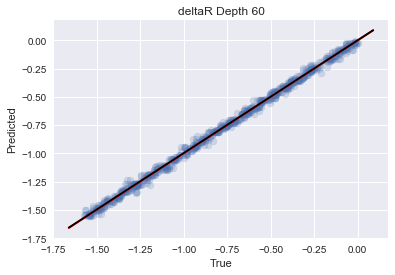

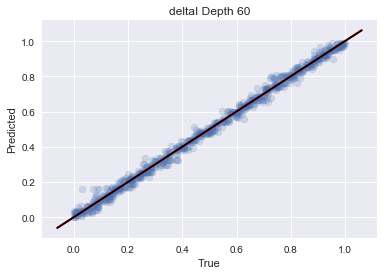

In [7]:
#Plot results
plotSummary(deltas_test['deltaR'], deltas_pred_DT[:,0], 'deltaR Depth 60')
plotSummary(deltas_test['deltaI'], deltas_pred_DT[:,1], 'deltaI Depth 60')

In [8]:
#Print Coefficients/Importances
data = pd.DataFrame(regr_DT.feature_importances_.T, columns = ['Coefficients ']) 
data.index = points_train.columns
print(data[data['Coefficients ']>0.001])

                Coefficients 
Top Point 17         0.007739
Top Point 29         0.006070
Top Point 111        0.005371
Top Point 154        0.001097
Top Point 186        0.001992
Top Point 217        0.006141
Top Point 287        0.006828
Top Point 300        0.105135
Top Point 417        0.008237
Top Point 450        0.002473
Bond Point 0         0.035545
Bond Point 22        0.002338
Bond Point 53        0.001301
Bond Point 56        0.037462
Bond Point 86        0.032942
Bond Point 92        0.002287
Bond Point 146       0.003103
Bond Point 195       0.028147
Bond Point 201       0.002060
Bond Point 224       0.002847
Bond Point 226       0.001405
Bond Point 227       0.002622
Bond Point 240       0.001744
Bond Point 251       0.107226
Bond Point 274       0.002256
Bond Point 275       0.002143
Bond Point 286       0.002150
Bond Point 322       0.008891
Bond Point 347       0.010064
Bond Point 359       0.001811
Bond Point 404       0.001594
Bond Point 429       0.532799


In [9]:
#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', round(regr_DT.score(points_test,deltas_test), 4),', using max depth of 60')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=60, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, points, deltas, cv=10))

Regression - Decision Tree -  Score:  0.9964 , using max depth of 60
 
Cross Validation Scores for regressor with max depth of  60  :  [0.99558705 0.99491694 0.99521151 0.99550489 0.99509722 0.9952569
 0.995864   0.99535556 0.99492553 0.99519975]


Random Forest

In [10]:
# Initialize Model 
randState = 42
regr_RF = RandomForestRegressor(max_depth = 30, n_estimators = 30, random_state=randState)

# Fit Model 
model_RF = regr_RF.fit(points_train, deltas_train)

# Use Model to Predict 
predict_RF = model_RF.predict(points_test)

# Find Importances
importance_RF_10 = pd.Series(model_RF.feature_importances_, index = points_train.columns)


 
RMSE on test data: 0.0084 for  deltaR 30x30
R^2 Score on test data: 0.9996 for deltaR 30x30
 
RMSE on test data: 0.009 for  deltaI 30x30
R^2 Score on test data: 0.9991 for deltaI 30x30

 Score - Random Forest: 0.9995 for delta R/I 30x30


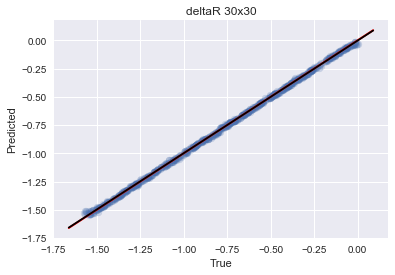

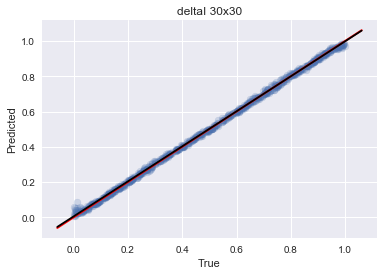

In [11]:
# Plot Results 
plotSummary(deltas_test['deltaR'], predict_RF[:,0], 'deltaR 30x30')
plotSummary(deltas_test['deltaI'], predict_RF[:,1], 'deltaI 30x30')

print('\n Score - Random Forest:' , round(model_RF.score(points_test, deltas_test),4), 'for delta R/I 30x30')

# Adaboost Random Forest 

 
RMSE on test data: 0.0049 for  AdaBoost Delta R
R^2 Score on test data: 0.9999 for AdaBoost Delta R
 
RMSE on test data: 0.0077 for  AdaBoost Delta I
R^2 Score on test data: 0.9993 for AdaBoost Delta I
Delta R AdaBoost Score: 0.9998808535200854
Delta I AdaBoost Score: 0.9993354981276129


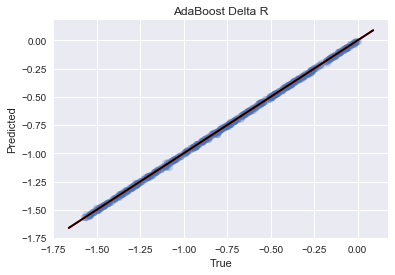

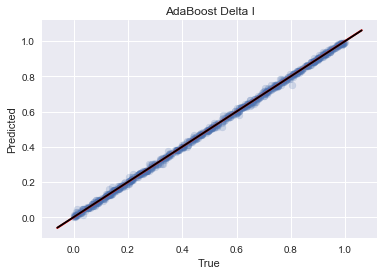

In [12]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 30

regr_AB = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB = regr_AB.fit(points_train, deltas_train['deltaR'])
model_AB_R = regr_ABR.fit(points_train, deltas_train['deltaI'])

y_pred_AB1 = model_AB.predict(points_test)
y_pred_AB1_R = model_AB_R.predict(points_test)

plotSummary(deltas_test['deltaR'], y_pred_AB1, 'AdaBoost Delta R')
plotSummary(deltas_test['deltaI'], y_pred_AB1_R, 'AdaBoost Delta I')

print('Delta R AdaBoost Score:', model_AB.score(points_test, deltas_test['deltaR']))
print('Delta I AdaBoost Score:', model_AB_R.score(points_test, deltas_test['deltaI']))

# Gradient Boost Random Forest 

 
RMSE on test data: 0.0064 for  GradientBoost Delta R
R^2 Score on test data: 0.9998 for GradientBoost Delta R
 
RMSE on test data: 0.0113 for  GradientBoost Delta I
R^2 Score on test data: 0.9986 for GradientBoost Delta I
Delta R Gradient Boost Score: 0.9997959611747363
Delta I Gradient Boost Score: 0.9985710837430116


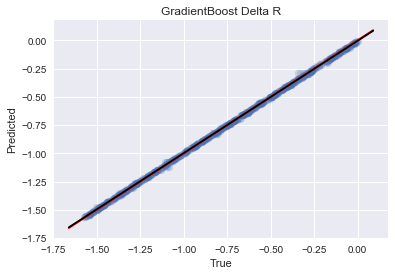

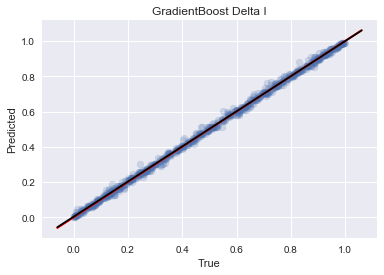

In [13]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 15
nest2 = 50


regr_GB = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GBR = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB = regr_GB.fit(points_train, deltas_train['deltaR'])
model_GB_R = regr_GBR.fit(points_train, deltas_train['deltaI'])

y_pred_GB1 = model_GB.predict(points_test)
y_pred_GB1_R = model_GB_R.predict(points_test)

plotSummary(deltas_test['deltaR'], y_pred_GB1, 'GradientBoost Delta R')
plotSummary(deltas_test['deltaI'], y_pred_GB1_R, 'GradientBoost Delta I')

print('Delta R Gradient Boost Score:', model_GB.score(points_test, deltas_test['deltaR']))
print('Delta I Gradient Boost Score:', model_GB_R.score(points_test, deltas_test['deltaI']))

# TESTING WITH EXPERIMENTAL DATA

In [14]:
#Load Experimental Data
exp_data = pd.read_csv('Training_Data/Graphene/ES_AG_Exp_data_changeDispersion_0.940.csv', header = None, names =topCol_names+bondCol_names ) # read the data in 
exp_data.head() # show the data in notebook 

,Top Point 0,Top Point 1,Top Point 2,Top Point 3,Top Point 4,Top Point 5,Top Point 6,Top Point 7,Top Point 8,Top Point 9,...,Bond Point 441,Bond Point 442,Bond Point 443,Bond Point 444,Bond Point 445,Bond Point 446,Bond Point 447,Bond Point 448,Bond Point 449,Bond Point 450
0,0.96513,0.97182,0.97799,0.98315,0.98727,0.99158,0.99448,0.99849,1.0022,1.0059,...,1.041,1.0438,1.0449,1.0444,1.0455,1.047,1.0482,1.0505,1.0531,1.0539


In [15]:
pred_phase_DT = regr_DT.predict(exp_data)

pred_phase_RF = regr_RF.predict(exp_data)

pred_phase_AB_R = model_AB_R.predict(exp_data)
pred_phase_AB_I = model_AB.predict(exp_data)

pred_phase_GB_I = model_GB.predict(exp_data)
pred_phase_GB_R = model_GB_R.predict(exp_data)

predictedPhases = pd.DataFrame(pred_phase_DT, columns = ['deltaR', 'deltaI'], index = ['Decision Tree'])

predictedPhases.loc['Random Forest'] = pred_phase_RF[0]
predictedPhases.loc['AdaBoost'] = (pred_phase_AB_I[0], pred_phase_AB_R[0])
predictedPhases.loc['Gradient Boosting'] = (pred_phase_GB_I[0], pred_phase_GB_R[0])


predictedPhases

,deltaR,deltaI
Decision Tree,-0.144870,0.046027
Random Forest,-0.109953,0.043743
AdaBoost,-0.105851,0.039604
Gradient Boosting,-0.100313,0.064652
